**Importing libraries**

In [1]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

**reading in the fandango_scrape.csv file**

In [2]:
fandango = pd.read_csv("fandango_scrape.csv")

**Exploring the DataFrame Properties and Head**

In [3]:
fandango.head(5)

FILM  STARS  RATING  VOTES
0  Fifty Shades of Grey (2015)    4.0     3.9  34846
1        Jurassic World (2015)    4.5     4.5  34390
2       American Sniper (2015)    5.0     4.8  34085
3             Furious 7 (2015)    5.0     4.8  33538
4            Inside Out (2015)    4.5     4.5  15749

In [4]:
fandango.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 504 entries, 0 to 503
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   FILM    504 non-null    object 
 1   STARS   504 non-null    float64
 2   RATING  504 non-null    float64
 3   VOTES   504 non-null    int64  
dtypes: float64(2), int64(1), object(1)
memory usage: 15.9+ KB


In [5]:
fandango.describe()

STARS      RATING         VOTES
count  504.000000  504.000000    504.000000
mean     3.558532    3.375794   1147.863095
std      1.563133    1.491223   3830.583136
min      0.000000    0.000000      0.000000
25%      3.500000    3.100000      3.000000
50%      4.000000    3.800000     18.500000
75%      4.500000    4.300000    189.750000
max      5.000000    5.000000  34846.000000

**exploring the relationship between popularity of a film and its rating and creating a scatterplot showing the relationship between rating and votes**

<AxesSubplot:xlabel='RATING', ylabel='VOTES'>

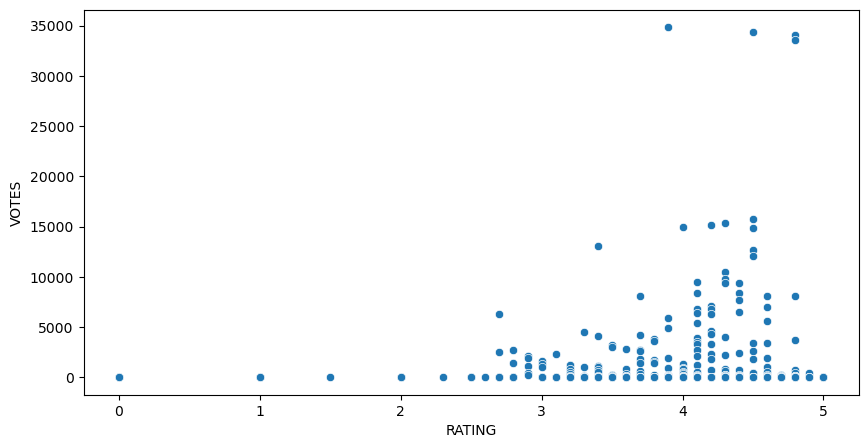

In [6]:
plt.figure(figsize= (10,5))
sns.scatterplot(data = fandango, x ='RATING', y ='VOTES')

**Calculating the correlation between the columns:**

In [7]:

fandango.corr()

STARS    RATING     VOTES
STARS   1.000000  0.994696  0.164218
RATING  0.994696  1.000000  0.163764
VOTES   0.164218  0.163764  1.000000

In [8]:
fandango['YEAR']=fandango['FILM'].str.slice(start=-5,stop=-1)


**checking How many movies are in the Fandango DataFrame per year?**

In [9]:

fandango['YEAR'].astype(int).value_counts()

2015    478
2014     23
2016      1
1964      1
2012      1
Name: YEAR, dtype: int64

**Visualizing the count of movies per year with a plot:**

<AxesSubplot:xlabel='YEAR', ylabel='count'>

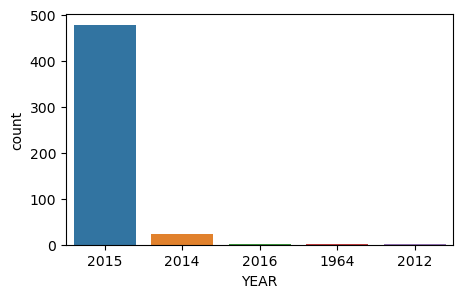

In [10]:

plt.figure(figsize=(5,3))
sns.countplot(x =fandango['YEAR'])

**the 10 movies with the highest number of votes?**

In [11]:

fandango.sort_values(by = 'VOTES', ascending=False).head(10)

FILM  STARS  RATING  VOTES  \
0                       Fifty Shades of Grey (2015)    4.0     3.9  34846   
1                             Jurassic World (2015)    4.5     4.5  34390   
2                            American Sniper (2015)    5.0     4.8  34085   
3                                  Furious 7 (2015)    5.0     4.8  33538   
4                                 Inside Out (2015)    4.5     4.5  15749   
5  The Hobbit: The Battle of the Five Armies (2014)    4.5     4.3  15337   
6               Kingsman: The Secret Service (2015)    4.5     4.2  15205   
7                                    Minions (2015)    4.0     4.0  14998   
8                    Avengers: Age of Ultron (2015)    5.0     4.5  14846   
9                             Into the Woods (2014)    3.5     3.4  13055   

   YEAR  
0  2015  
1  2015  
2  2015  
3  2015  
4  2015  
5  2014  
6  2015  
7  2015  
8  2015  
9  2014

**movies have zero votes**

In [12]:

fandango['VOTES'][fandango['VOTES'] == 0].count()

69


**removing any films that have zero votes.**

In [13]:

fandango['VOTES'] = fandango['VOTES'][fandango['VOTES'] > 0]

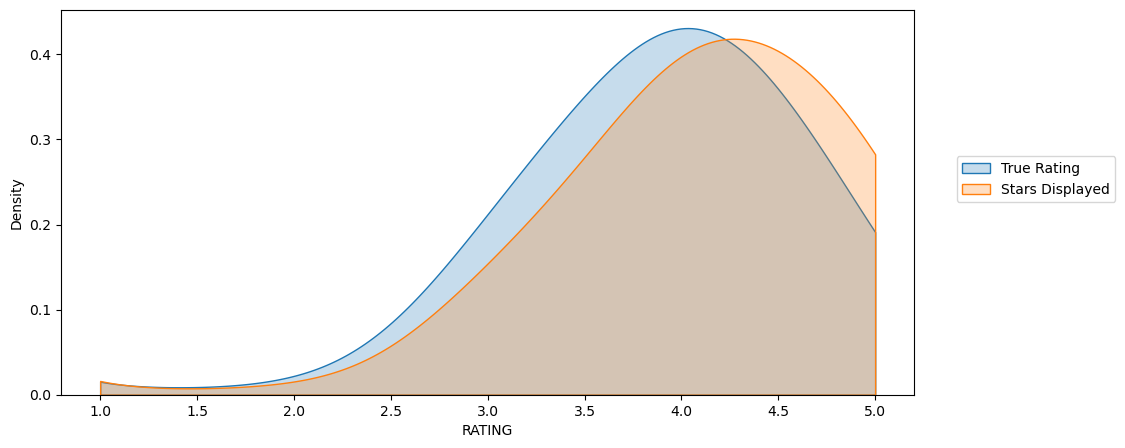

In [14]:

plt.figure(figsize=(11,5))
sns.kdeplot(data= fandango, x = 'RATING', clip= (1,5),cut=0, fill = True, label='True Rating')
sns.kdeplot(data= fandango, x = 'STARS', clip= (1,5),cut=0,fill = True, label='Stars Displayed')

plt.legend(loc = (1.05,0.5))


**Calculating this difference with STARS-RATING and round these differences to the nearest decimal point.**

In [15]:
fandango['STARS_DIFF'] = fandango['STARS'] - fandango['RATING']
fandango['STARS_DIFF'] = np.round(fandango['STARS_DIFF'], decimals=1)
fandango['STARS_DIFF'].value_counts()


0.0    176
0.2     82
0.3     72
0.4     70
0.1     66
0.5     37
1.0      1
Name: STARS_DIFF, dtype: int64

In [16]:
fandango

FILM  STARS  RATING    VOTES  YEAR  \
0             Fifty Shades of Grey (2015)    4.0     3.9  34846.0  2015   
1                   Jurassic World (2015)    4.5     4.5  34390.0  2015   
2                  American Sniper (2015)    5.0     4.8  34085.0  2015   
3                        Furious 7 (2015)    5.0     4.8  33538.0  2015   
4                       Inside Out (2015)    4.5     4.5  15749.0  2015   
..                                    ...    ...     ...      ...   ...   
499                      Valiyavan (2015)    0.0     0.0      NaN  2015   
500            WWE SummerSlam 2015 (2015)    0.0     0.0      NaN  2015   
501       Yagavarayinum Naa Kaakka (2015)    0.0     0.0      NaN  2015   
502  Yesterday, Today and Tomorrow (1964)    0.0     0.0      NaN  1964   
503                         Zarafa (2012)    0.0     0.0      NaN  2012   

     STARS_DIFF  
0           0.1  
1           0.0  
2           0.2  
3           0.2  
4           0.0  
..          ...  
499         0.0  
500         0.0  
501         0.0  
502         0.0  
503         0.0  

[504 rows x 6 columns]

**Creating a count plot to display the number of times a certain difference occurs:**

<AxesSubplot:xlabel='STARS_DIFF', ylabel='count'>

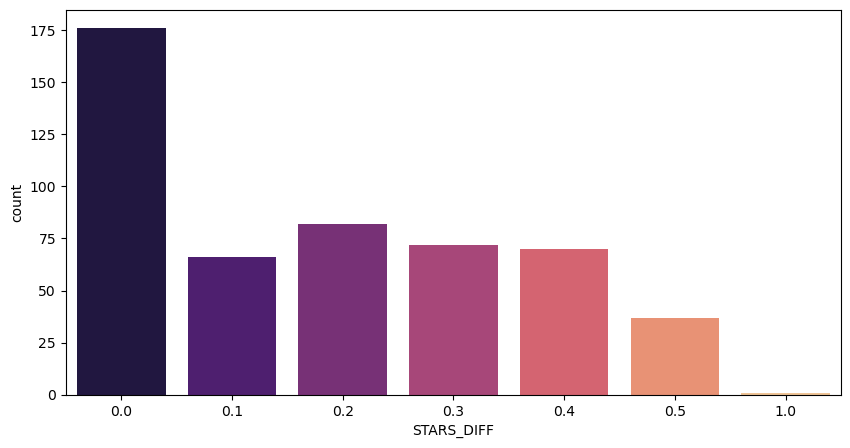

In [17]:

plt.figure(figsize=(10,5))
sns.countplot(data = fandango, x='STARS_DIFF', palette='magma')

In [18]:

fandango[fandango['STARS_DIFF']>=1]


FILM  STARS  RATING  VOTES  YEAR  STARS_DIFF
381  Turbo Kid (2015)    5.0     4.0    2.0  2015         1.0

In [19]:
all_sites = pd.read_csv("all_sites_scores.csv")

**Exploring the DataFrame columns, info, description.**

In [20]:
all_sites.head()

FILM  RottenTomatoes  RottenTomatoes_User  \
0  Avengers: Age of Ultron (2015)              74                   86   
1               Cinderella (2015)              85                   80   
2                  Ant-Man (2015)              80                   90   
3          Do You Believe? (2015)              18                   84   
4   Hot Tub Time Machine 2 (2015)              14                   28   

   Metacritic  Metacritic_User  IMDB  Metacritic_user_vote_count  \
0          66              7.1   7.8                        1330   
1          67              7.5   7.1                         249   
2          64              8.1   7.8                         627   
3          22              4.7   5.4                          31   
4          29              3.4   5.1                          88   

   IMDB_user_vote_count  
0                271107  
1                 65709  
2                103660  
3                  3136  
4                 19560

In [21]:
all_sites.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146 entries, 0 to 145
Data columns (total 8 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   FILM                        146 non-null    object 
 1   RottenTomatoes              146 non-null    int64  
 2   RottenTomatoes_User         146 non-null    int64  
 3   Metacritic                  146 non-null    int64  
 4   Metacritic_User             146 non-null    float64
 5   IMDB                        146 non-null    float64
 6   Metacritic_user_vote_count  146 non-null    int64  
 7   IMDB_user_vote_count        146 non-null    int64  
dtypes: float64(2), int64(5), object(1)
memory usage: 9.2+ KB


In [22]:
all_sites.describe()

RottenTomatoes  RottenTomatoes_User  Metacritic  Metacritic_User  \
count      146.000000           146.000000  146.000000       146.000000   
mean        60.849315            63.876712   58.808219         6.519178   
std         30.168799            20.024430   19.517389         1.510712   
min          5.000000            20.000000   13.000000         2.400000   
25%         31.250000            50.000000   43.500000         5.700000   
50%         63.500000            66.500000   59.000000         6.850000   
75%         89.000000            81.000000   75.000000         7.500000   
max        100.000000            94.000000   94.000000         9.600000   

             IMDB  Metacritic_user_vote_count  IMDB_user_vote_count  
count  146.000000                  146.000000            146.000000  
mean     6.736986                  185.705479          42846.205479  
std      0.958736                  316.606515          67406.509171  
min      4.000000                    4.000000            243.000000  
25%      6.300000                   33.250000           5627.000000  
50%      6.900000                   72.500000          19103.000000  
75%      7.400000                  168.500000          45185.750000  
max      8.600000                 2375.000000         334164.000000


**Creating a scatterplot exploring the relationship between RT Critic reviews and RT User reviews.**

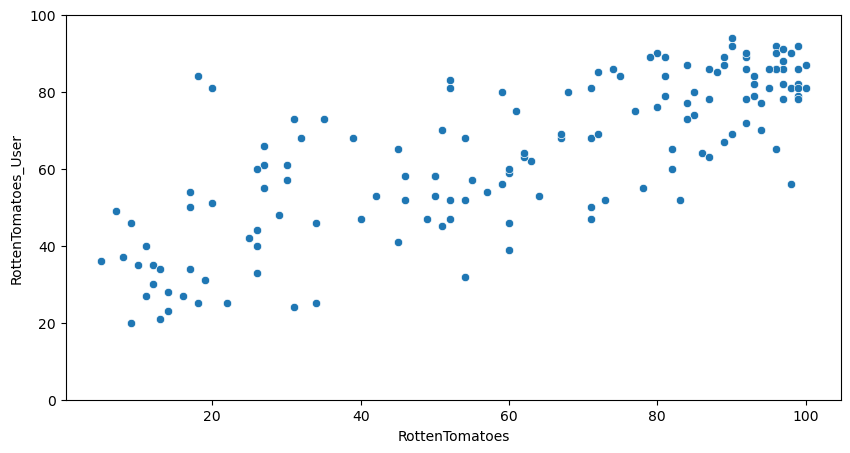

In [23]:

plt.figure(figsize=(10,5))
sns.scatterplot(data = all_sites,x= 'RottenTomatoes',y= 'RottenTomatoes_User')
plt.yticks([0,20,40,60,80,100])
plt.show()


**Creating a new column based off the difference between critics ratings and users ratings for Rotten Tomatoes.**

In [24]:

all_sites['Rotten_Diff'] = all_sites['RottenTomatoes'] - all_sites['RottenTomatoes_User']
all_sites['Rotten_Diff']

0     -12
1       5
2     -10
3     -66
4     -14
       ..
141     9
142    15
143    19
144    19
145    24
Name: Rotten_Diff, Length: 146, dtype: int64

**Calculating the Mean Absolute Difference between RT scores and RT User scores as described above.**

In [25]:

all_sites['Rotten_Diff'].abs().mean()

15.095890410958905

In [26]:
all_sites['Rotten_Diff_abs'] = all_sites['Rotten_Diff'].abs()

**Ploting the distribution of the differences between RT Critics Score and RT User Score. There should be negative values in this distribution plot.**

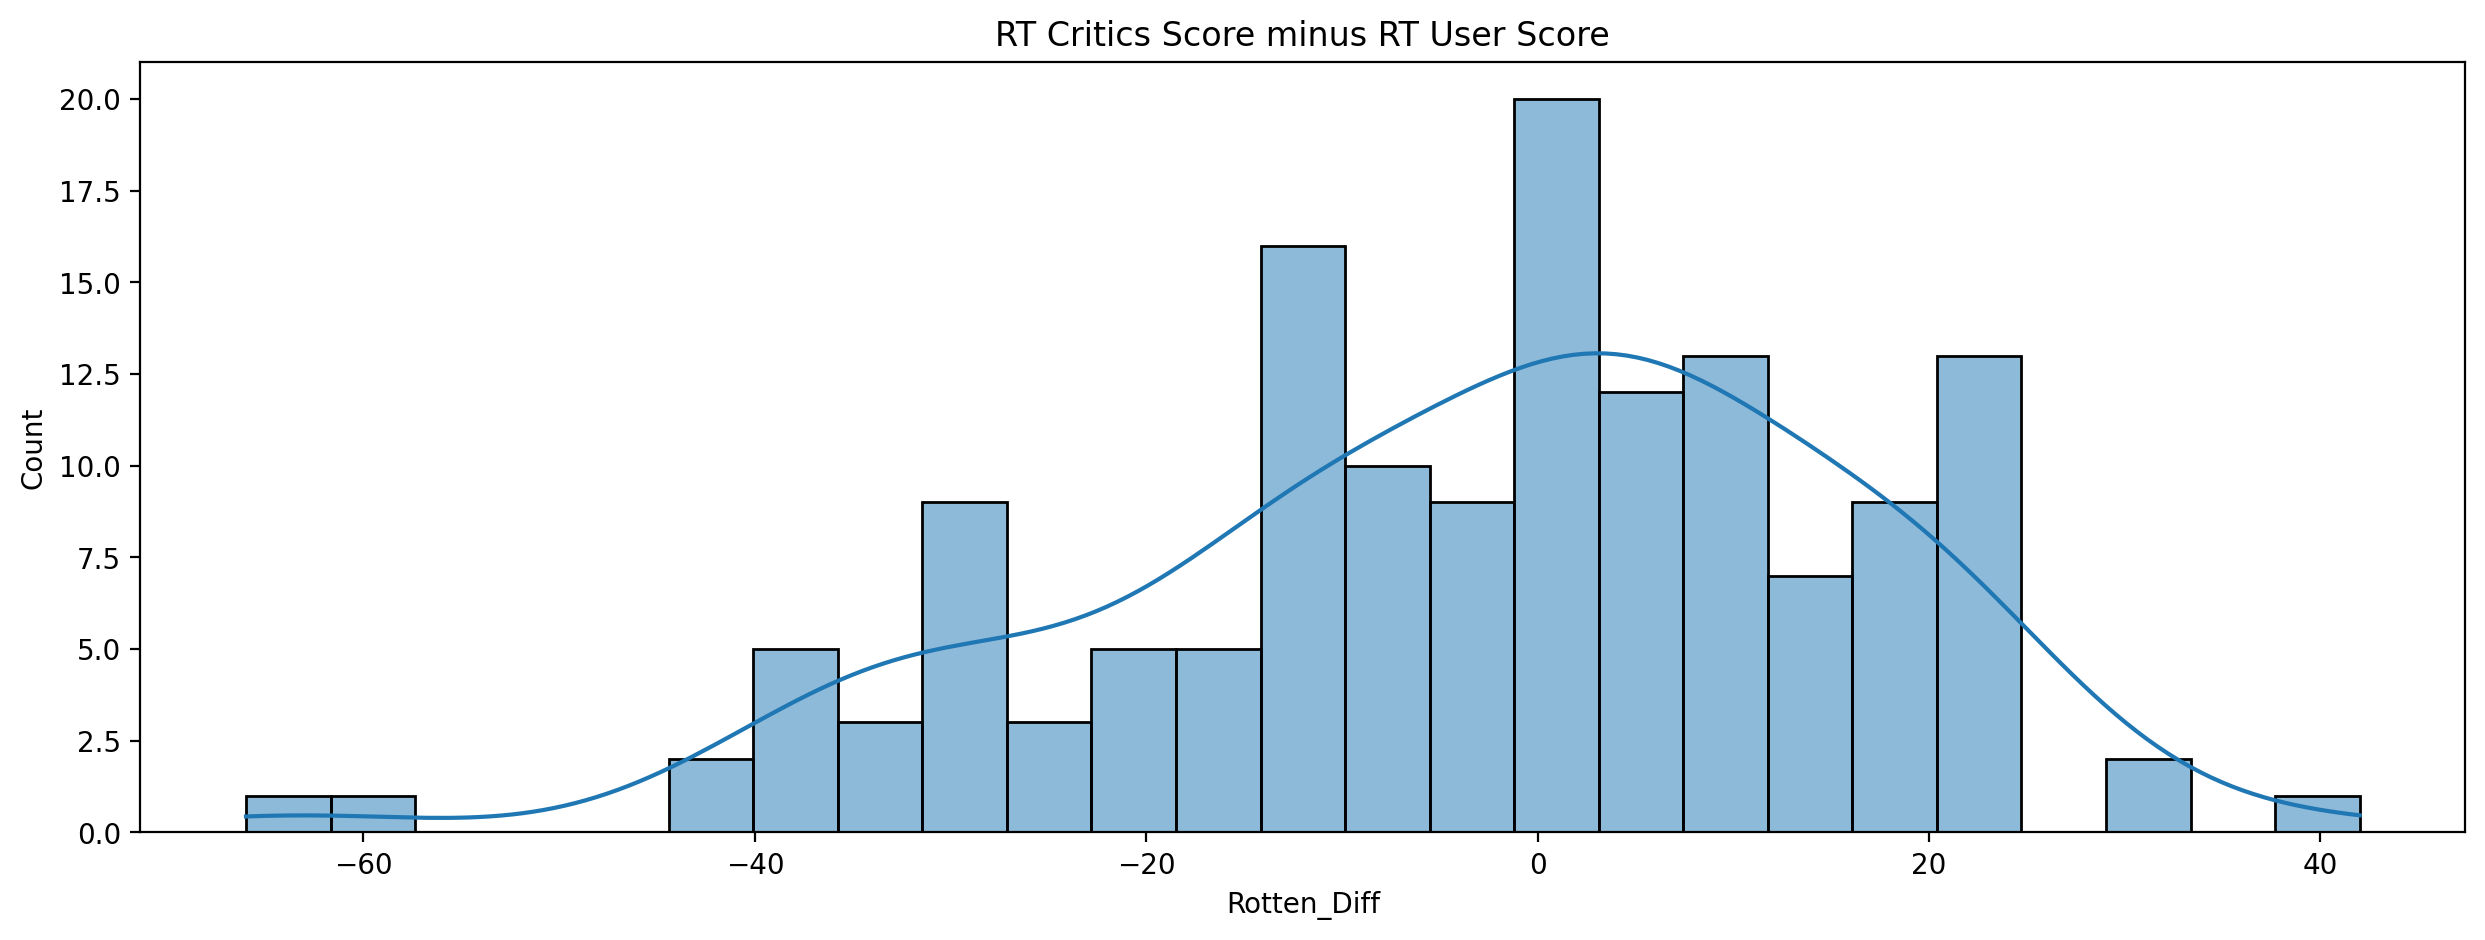

In [27]:

plt.figure(figsize=(15,5), dpi = 200)
sns.histplot(data = all_sites, x='Rotten_Diff', kde=True, bins=25)
plt.yticks(np.arange(0,22,2.5))
plt.title('RT Critics Score minus RT User Score')
plt.show()

**creating a distribution showing the *absolute value* difference between Critics and Users on Rotten Tomatoes.**

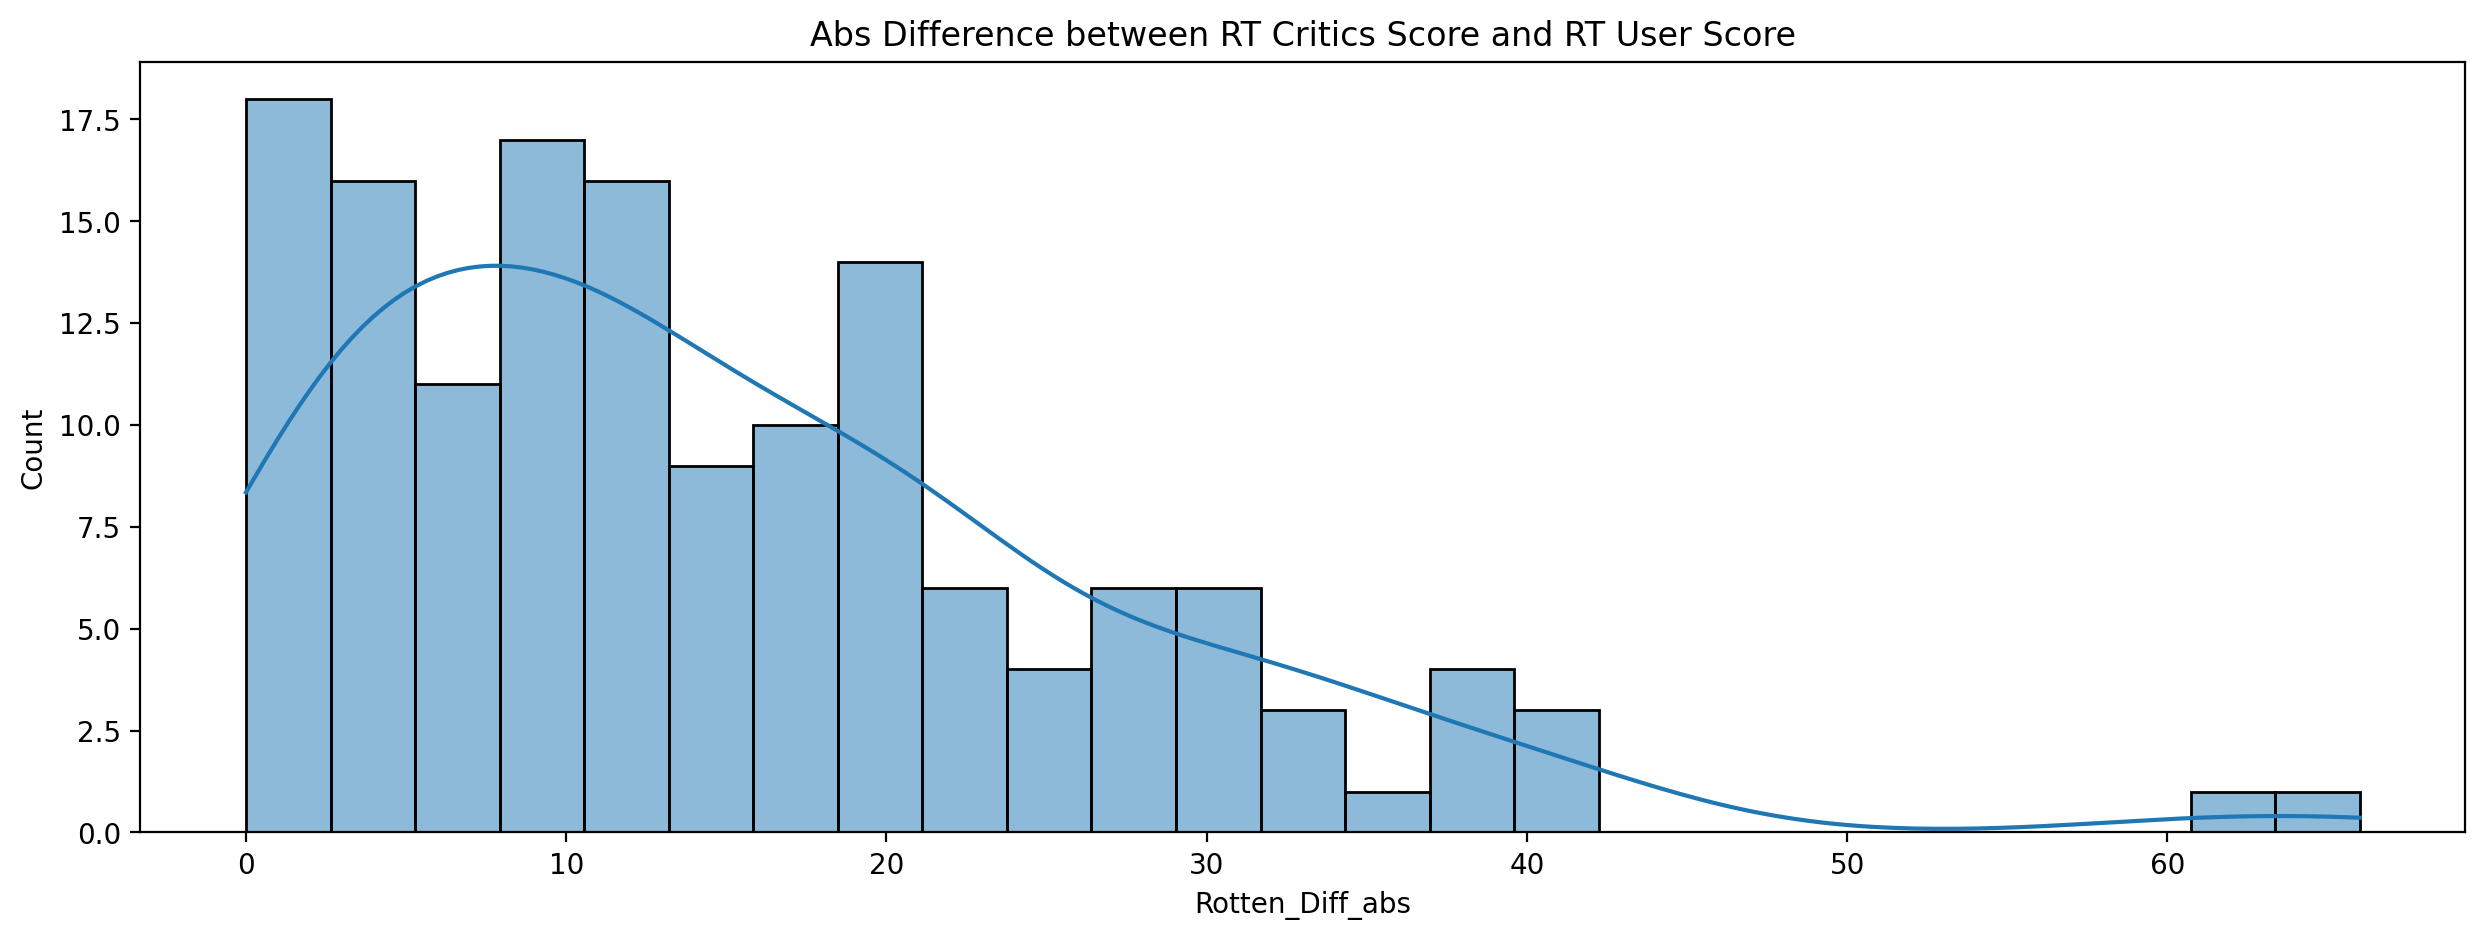

In [28]:

plt.figure(figsize=(15,5), dpi = 200)
sns.histplot(data = all_sites, x='Rotten_Diff_abs', kde=True, bins=25)
plt.yticks(np.arange(0,20,2.5))
plt.title('Abs Difference between RT Critics Score and RT User Score')
plt.show()

**the top 5 movies users rated higher than critics on average:**

In [29]:

print('Users Love but Critics Hate')
all_sites[['FILM', 'Rotten_Diff']].nsmallest(5,'Rotten_Diff')

Users Love but Critics Hate


FILM  Rotten_Diff
3       Do You Believe? (2015)          -66
85           Little Boy (2015)          -61
105    Hitman: Agent 47 (2015)          -42
134    The Longest Ride (2015)          -42
125  The Wedding Ringer (2015)          -39

**the top 5 movies critics scores higher than users on average.**

In [30]:

print('Critics Love but Users Hate')
all_sites[['FILM', 'Rotten_Diff']].nlargest(5,'Rotten_Diff')

Critics Love but Users Hate


FILM  Rotten_Diff
69                  Mr. Turner (2014)           42
112                 It Follows (2015)           31
115          While We're Young (2015)           31
37               Welcome to Me (2015)           24
40   I'll See You In My Dreams (2015)           24

**Displaying a scatterplot of the Metacritic Rating versus the Metacritic User rating.**

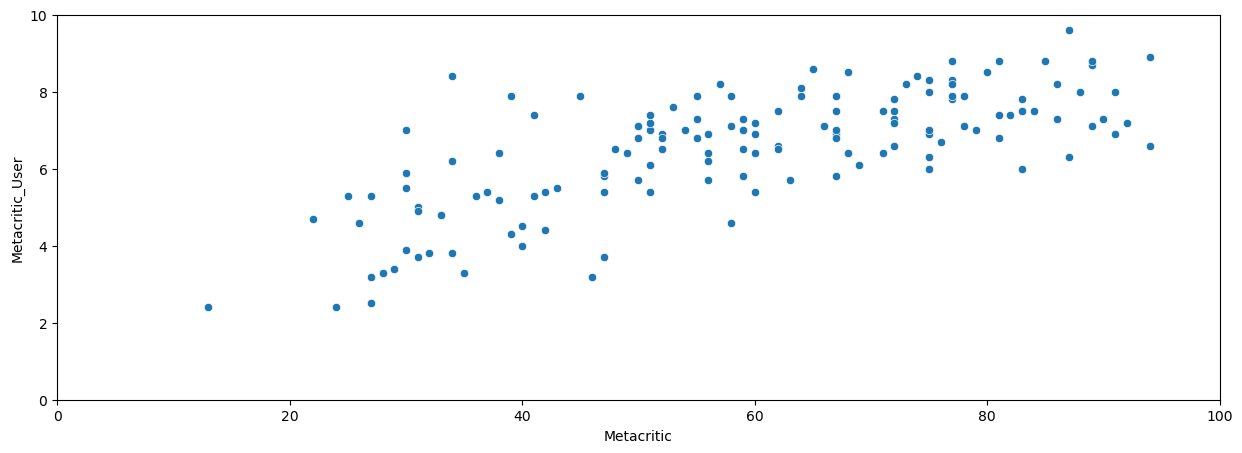

In [31]:
# CODE HERE
plt.figure(figsize=(15,5))
sns.scatterplot(data=all_sites, x='Metacritic', y='Metacritic_User')
plt.yticks(np.arange(0,12,2))
plt.xticks(np.arange(0,120,20))
plt.show()

In [32]:
all_sites.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146 entries, 0 to 145
Data columns (total 10 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   FILM                        146 non-null    object 
 1   RottenTomatoes              146 non-null    int64  
 2   RottenTomatoes_User         146 non-null    int64  
 3   Metacritic                  146 non-null    int64  
 4   Metacritic_User             146 non-null    float64
 5   IMDB                        146 non-null    float64
 6   Metacritic_user_vote_count  146 non-null    int64  
 7   IMDB_user_vote_count        146 non-null    int64  
 8   Rotten_Diff                 146 non-null    int64  
 9   Rotten_Diff_abs             146 non-null    int64  
dtypes: float64(2), int64(7), object(1)
memory usage: 11.5+ KB



**Creating a scatterplot for the relationship between vote counts on MetaCritic versus vote counts on IMDB.**

<AxesSubplot:xlabel='Metacritic_user_vote_count', ylabel='IMDB_user_vote_count'>

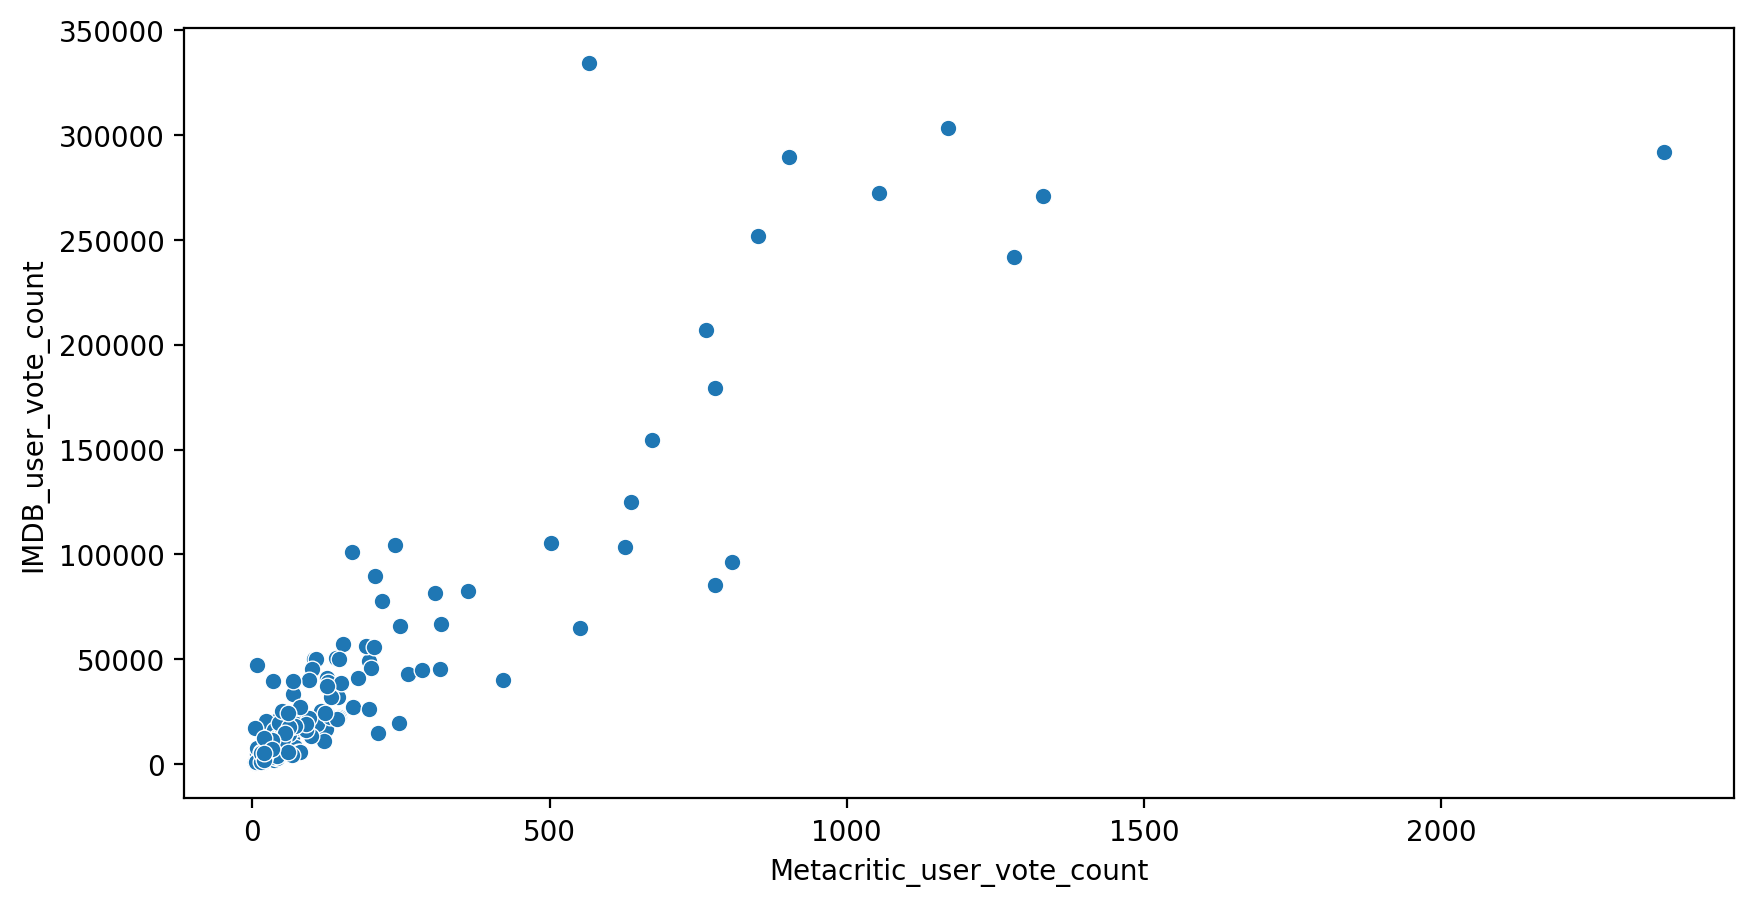

In [33]:

plt.figure(figsize=(10,5), dpi=200)
sns.scatterplot(data=all_sites, x='Metacritic_user_vote_count', y='IMDB_user_vote_count')



**the highest IMDB user vote count?**

In [34]:

all_sites.nlargest(1,'IMDB_user_vote_count')

FILM  RottenTomatoes  RottenTomatoes_User  \
14  The Imitation Game (2014)              90                   92   

    Metacritic  Metacritic_User  IMDB  Metacritic_user_vote_count  \
14          73              8.2   8.1                         566   

    IMDB_user_vote_count  Rotten_Diff  Rotten_Diff_abs  
14                334164           -2                2

**the highest Metacritic User Vote count**

In [35]:


all_sites.nlargest(1,'Metacritic_user_vote_count')

FILM  RottenTomatoes  RottenTomatoes_User  \
88  Mad Max: Fury Road (2015)              97                   88   

    Metacritic  Metacritic_User  IMDB  Metacritic_user_vote_count  \
88          89              8.7   8.3                        2375   

    IMDB_user_vote_count  Rotten_Diff  Rotten_Diff_abs  
88                292023            9                9

**Combining the Fandango Table with the All Sites table. Not every movie in the Fandango table is in the All Sites table, since some Fandango movies have very little or no reviews.**

In [36]:

merged_data = pd.merge(fandango,all_sites, how='inner', on='FILM')

In [37]:
merged_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 145 entries, 0 to 144
Data columns (total 15 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   FILM                        145 non-null    object 
 1   STARS                       145 non-null    float64
 2   RATING                      145 non-null    float64
 3   VOTES                       145 non-null    float64
 4   YEAR                        145 non-null    object 
 5   STARS_DIFF                  145 non-null    float64
 6   RottenTomatoes              145 non-null    int64  
 7   RottenTomatoes_User         145 non-null    int64  
 8   Metacritic                  145 non-null    int64  
 9   Metacritic_User             145 non-null    float64
 10  IMDB                        145 non-null    float64
 11  Metacritic_user_vote_count  145 non-null    int64  
 12  IMDB_user_vote_count        145 non-null    int64  
 13  Rotten_Diff                 145 non

In [38]:
merged_data.head(5)

FILM  STARS  RATING    VOTES  YEAR  STARS_DIFF  \
0  Fifty Shades of Grey (2015)    4.0     3.9  34846.0  2015         0.1   
1        Jurassic World (2015)    4.5     4.5  34390.0  2015         0.0   
2       American Sniper (2015)    5.0     4.8  34085.0  2015         0.2   
3             Furious 7 (2015)    5.0     4.8  33538.0  2015         0.2   
4            Inside Out (2015)    4.5     4.5  15749.0  2015         0.0   

   RottenTomatoes  RottenTomatoes_User  Metacritic  Metacritic_User  IMDB  \
0              25                   42          46              3.2   4.2   
1              71                   81          59              7.0   7.3   
2              72                   85          72              6.6   7.4   
3              81                   84          67              6.8   7.4   
4              98                   90          94              8.9   8.6   

   Metacritic_user_vote_count  IMDB_user_vote_count  Rotten_Diff  \
0                         778                179506          -17   
1                        1281                241807          -10   
2                         850                251856          -13   
3                         764                207211           -3   
4                         807                 96252            8   

   Rotten_Diff_abs  
0               17  
1               10  
2               13  
3                3  
4                8


**Creating new normalized columns for all ratings so they match up within the 0-5 star range shown on Fandango.**


In [39]:

merged_data['IMDB_Norm'] = np.round(merged_data['IMDB']/2,1)
merged_data['IMDB_Norm']

0      2.1
1      3.6
2      3.7
3      3.7
4      4.3
      ... 
140    3.4
141    3.5
142    3.9
143    3.7
144    3.2
Name: IMDB_Norm, Length: 145, dtype: float64

In [40]:
np.round((merged_data['IMDB'] / merged_data['IMDB'].max(axis=0)) * 10 / 2, 1)

0      2.4
1      4.2
2      4.3
3      4.3
4      5.0
      ... 
140    3.9
141    4.1
142    4.5
143    4.3
144    3.7
Name: IMDB, Length: 145, dtype: float64

In [41]:
merged_data['RT_Norm'] = np.round(merged_data['RottenTomatoes']/20,1)
merged_data['RTU_Norm'] =  np.round(merged_data['RottenTomatoes_User']/20,1)

In [42]:

merged_data['Meta_Norm'] =  np.round(merged_data['Metacritic']/20,1)
merged_data['Meta_U_Norm'] =  np.round(merged_data['Metacritic_User']/2,1)

In [43]:
merged_data.head(5)

FILM  STARS  RATING    VOTES  YEAR  STARS_DIFF  \
0  Fifty Shades of Grey (2015)    4.0     3.9  34846.0  2015         0.1   
1        Jurassic World (2015)    4.5     4.5  34390.0  2015         0.0   
2       American Sniper (2015)    5.0     4.8  34085.0  2015         0.2   
3             Furious 7 (2015)    5.0     4.8  33538.0  2015         0.2   
4            Inside Out (2015)    4.5     4.5  15749.0  2015         0.0   

   RottenTomatoes  RottenTomatoes_User  Metacritic  Metacritic_User  IMDB  \
0              25                   42          46              3.2   4.2   
1              71                   81          59              7.0   7.3   
2              72                   85          72              6.6   7.4   
3              81                   84          67              6.8   7.4   
4              98                   90          94              8.9   8.6   

   Metacritic_user_vote_count  IMDB_user_vote_count  Rotten_Diff  \
0                         778                179506          -17   
1                        1281                241807          -10   
2                         850                251856          -13   
3                         764                207211           -3   
4                         807                 96252            8   

   Rotten_Diff_abs  IMDB_Norm  RT_Norm  RTU_Norm  Meta_Norm  Meta_U_Norm  
0               17        2.1      1.2       2.1        2.3          1.6  
1               10        3.6      3.6       4.0        3.0          3.5  
2               13        3.7      3.6       4.2        3.6          3.3  
3                3        3.7      4.0       4.2        3.4          3.4  
4                8        4.3      4.9       4.5        4.7          4.4

In [44]:
merged_data

FILM  STARS  RATING    VOTES  YEAR  \
0           Fifty Shades of Grey (2015)    4.0     3.9  34846.0  2015   
1                 Jurassic World (2015)    4.5     4.5  34390.0  2015   
2                American Sniper (2015)    5.0     4.8  34085.0  2015   
3                      Furious 7 (2015)    5.0     4.8  33538.0  2015   
4                     Inside Out (2015)    4.5     4.5  15749.0  2015   
..                                  ...    ...     ...      ...   ...   
140  Kumiko, The Treasure Hunter (2015)    3.5     3.5     41.0  2015   
141  The Diary of a Teenage Girl (2015)    4.0     3.6     38.0  2015   
142            The Wrecking Crew (2015)    4.5     4.2     38.0  2015   
143                    Tangerine (2015)    4.0     3.9     36.0  2015   
144            Maps to the Stars (2015)    3.5     3.1     35.0  2015   

     STARS_DIFF  RottenTomatoes  RottenTomatoes_User  Metacritic  \
0           0.1              25                   42          46   
1           0.0              71                   81          59   
2           0.2              72                   85          72   
3           0.2              81                   84          67   
4           0.0              98                   90          94   
..          ...             ...                  ...         ...   
140         0.0              87                   63          68   
141         0.4              95                   81          87   
142         0.3              93                   84          67   
143         0.1              95                   86          86   
144         0.4              60                   46          67   

     Metacritic_User  IMDB  Metacritic_user_vote_count  IMDB_user_vote_count  \
0                3.2   4.2                         778                179506   
1                7.0   7.3                        1281                241807   
2                6.6   7.4                         850                251856   
3                6.8   7.4                         764                207211   
4                8.9   8.6                         807                 96252   
..               ...   ...                         ...                   ...   
140              6.4   6.7                          19                  5289   
141              6.3   7.0                          18                  1107   
142              7.0   7.8                           4                   732   
143              7.3   7.4                          14                   696   
144              5.8   6.3                          46                 22440   

     Rotten_Diff  Rotten_Diff_abs  IMDB_Norm  RT_Norm  RTU_Norm  Meta_Norm  \
0            -17               17        2.1      1.2       2.1        2.3   
1            -10               10        3.6      3.6       4.0        3.0   
2            -13               13        3.7      3.6       4.2        3.6   
3             -3                3        3.7      4.0       4.2        3.4   
4              8                8        4.3      4.9       4.5        4.7   
..           ...              ...        ...      ...       ...        ...   
140           24               24        3.4      4.4       3.2        3.4   
141           14               14        3.5      4.8       4.0        4.4   
142            9                9        3.9      4.6       4.2        3.4   
143            9                9        3.7      4.8       4.3        4.3   
144           14               14        3.2      3.0       2.3        3.4   

     Meta_U_Norm  
0            1.6  
1            3.5  
2            3.3  
3            3.4  
4            4.4  
..           ...  
140          3.2  
141          3.2  
142          3.5  
143          3.6  
144          2.9  

[145 rows x 20 columns]

**creating a norm_scores DataFrame that only contains the normalizes ratings. Include both STARS and RATING from the original Fandango table.**

In [45]:

norm_scores= pd.DataFrame(merged_data[['STARS','RATING','RT_Norm','RTU_Norm','Meta_Norm', 'Meta_U_Norm','IMDB_Norm']])

In [46]:
norm_scores.head(5)

STARS  RATING  RT_Norm  RTU_Norm  Meta_Norm  Meta_U_Norm  IMDB_Norm
0    4.0     3.9      1.2       2.1        2.3          1.6        2.1
1    4.5     4.5      3.6       4.0        3.0          3.5        3.6
2    5.0     4.8      3.6       4.2        3.6          3.3        3.7
3    5.0     4.8      4.0       4.2        3.4          3.4        3.7
4    4.5     4.5      4.9       4.5        4.7          4.4        4.3

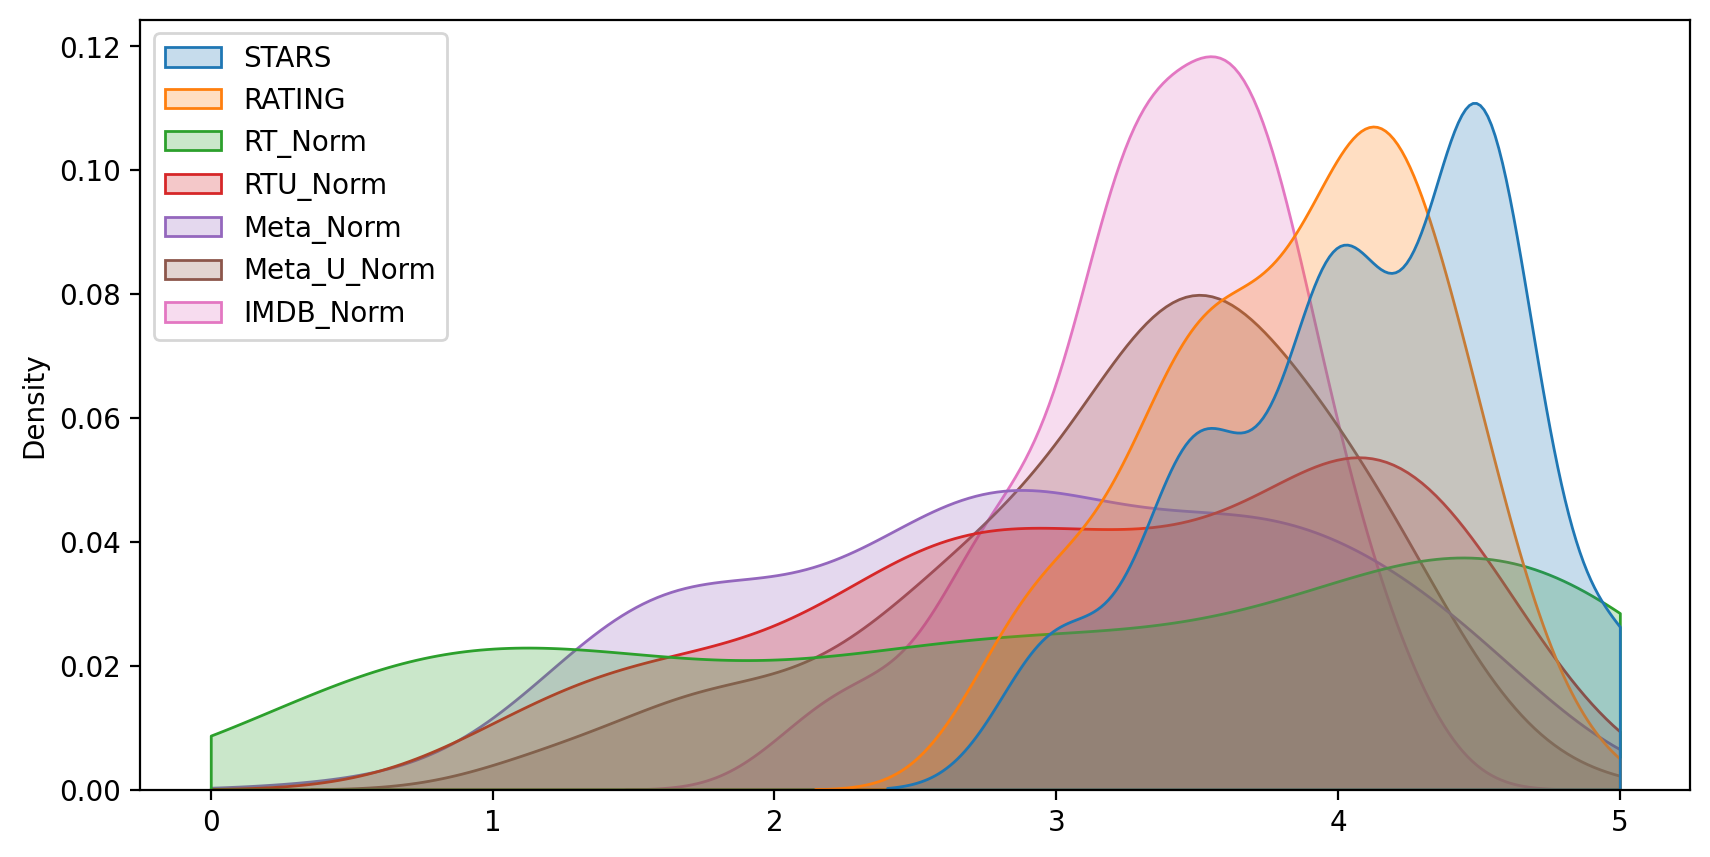

In [47]:

plt.figure(figsize=(10,5), dpi=200)
ax =sns.kdeplot(data = norm_scores, fill=True, clip =(0,5))
sns.move_legend(ax, 'upper left')
plt.show()



**creating a KDE plot that compare the distribution of RT critic ratings against the STARS displayed by Fandango.**

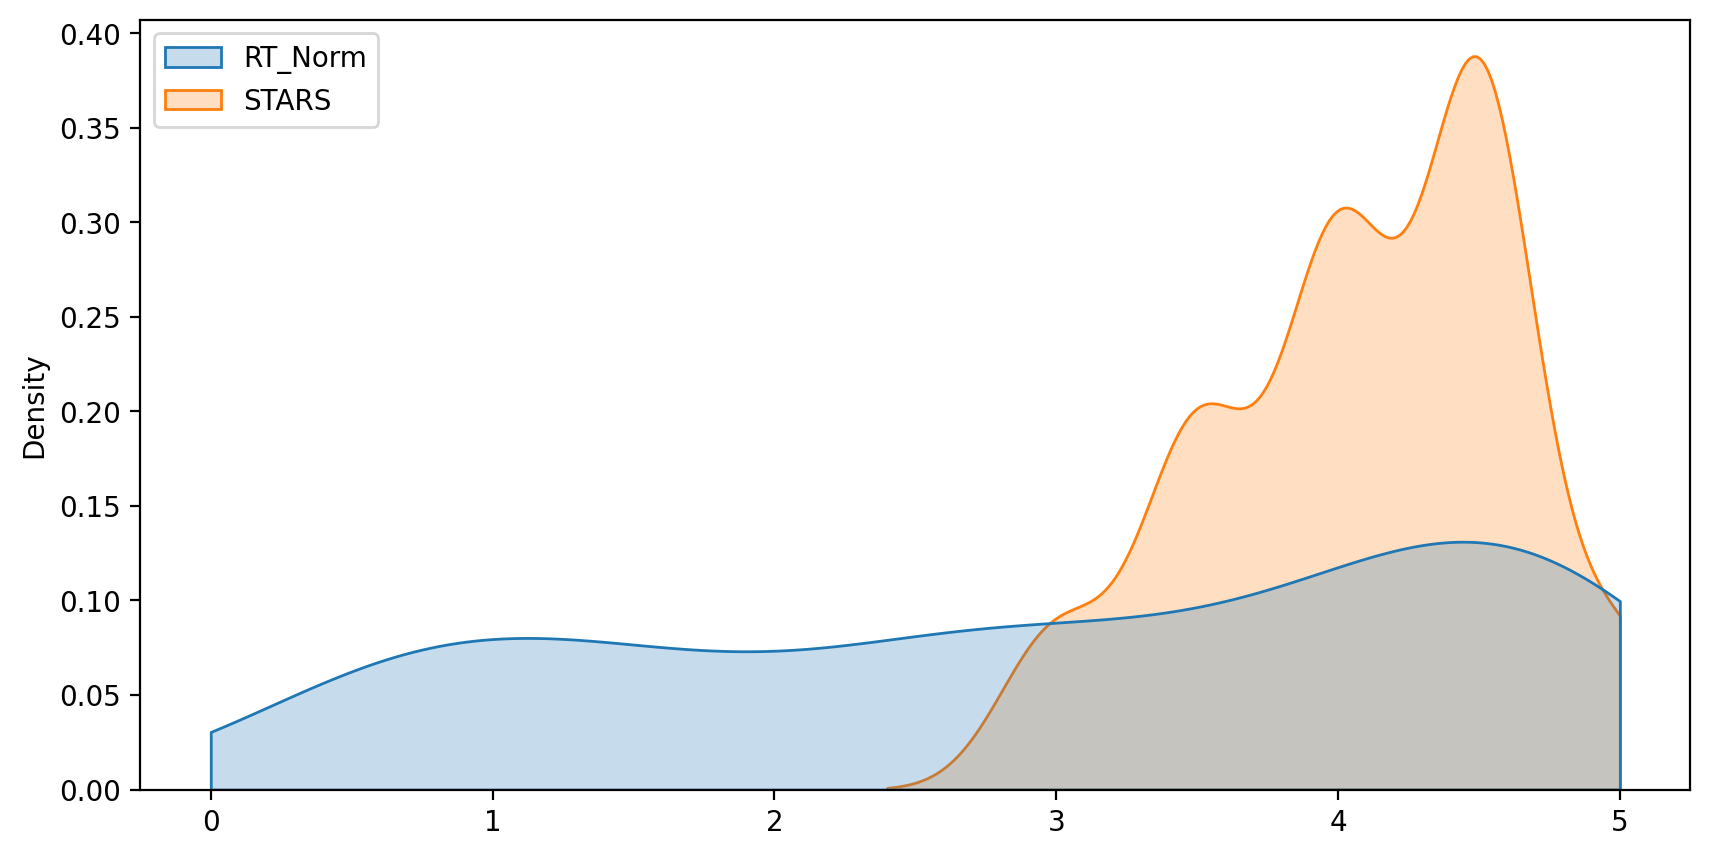

In [48]:

plt.figure(figsize=(10,5), dpi=200)
ax =sns.kdeplot(data = norm_scores[['RT_Norm','STARS']], fill=True, clip =(0,5))
sns.move_legend(ax, 'upper left')
plt.show()

**Creating a histplot comparing all normalized scores.**

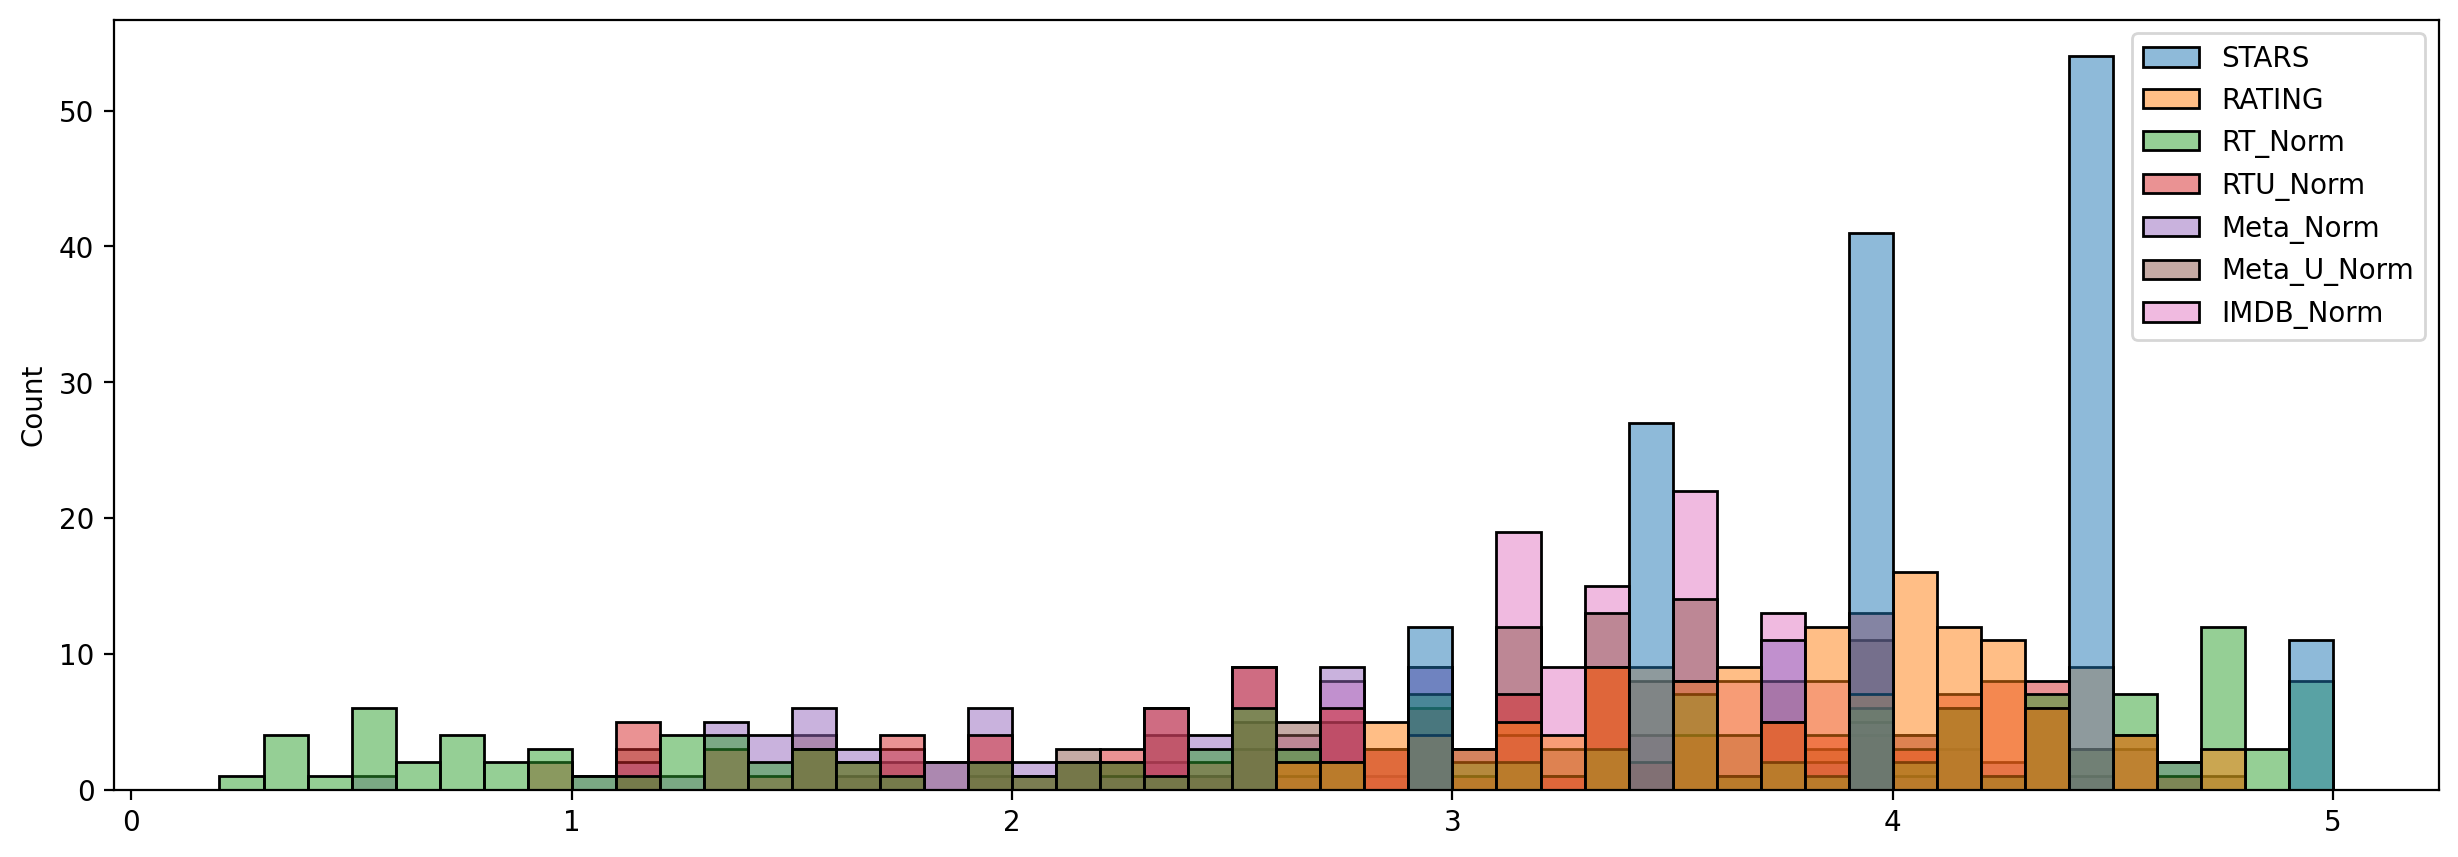

In [49]:
plt.figure(figsize=(15,5), dpi=200)
ax =sns.histplot(data = norm_scores, binwidth= 0.1)
sns.move_legend(ax, 'upper right')
plt.show()

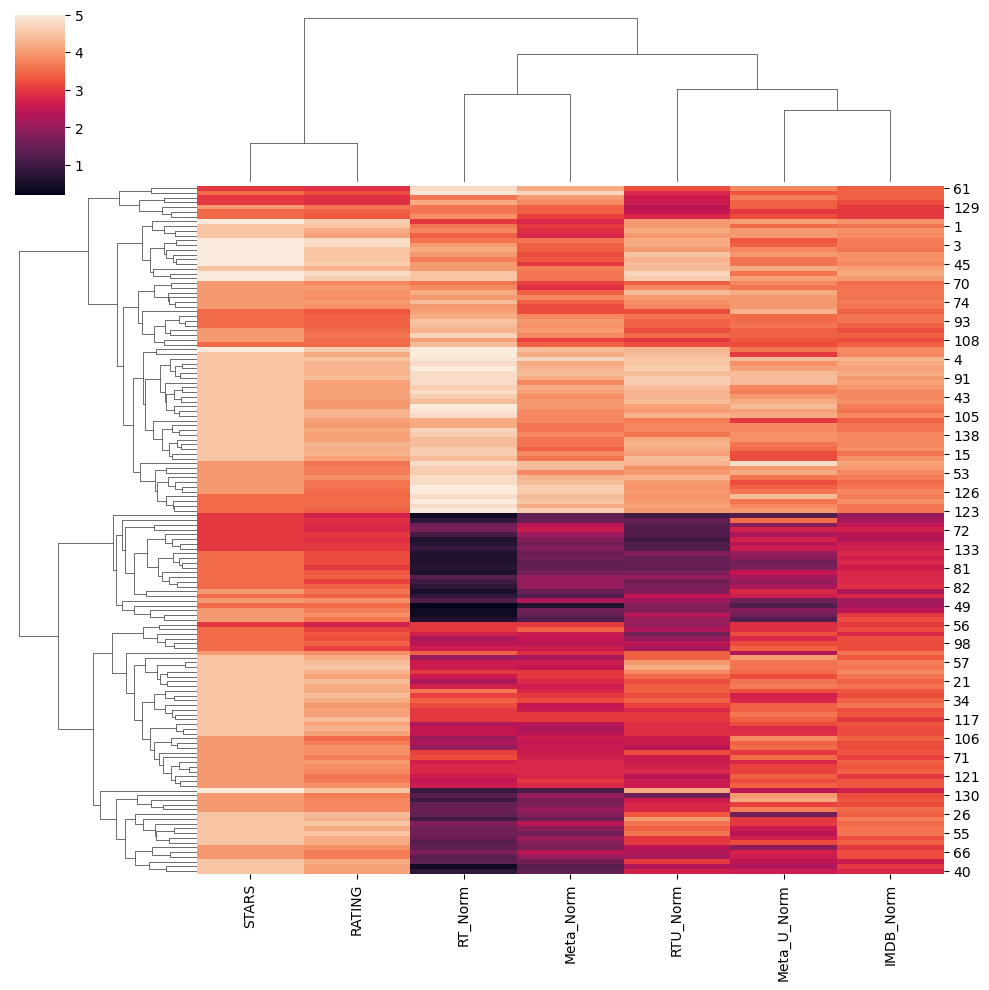

In [50]:

sns.clustermap(data= norm_scores)

In [51]:
norm_scores['FILM'] = merged_data['FILM']
norm_scores

STARS  RATING  RT_Norm  RTU_Norm  Meta_Norm  Meta_U_Norm  IMDB_Norm  \
0      4.0     3.9      1.2       2.1        2.3          1.6        2.1   
1      4.5     4.5      3.6       4.0        3.0          3.5        3.6   
2      5.0     4.8      3.6       4.2        3.6          3.3        3.7   
3      5.0     4.8      4.0       4.2        3.4          3.4        3.7   
4      4.5     4.5      4.9       4.5        4.7          4.4        4.3   
..     ...     ...      ...       ...        ...          ...        ...   
140    3.5     3.5      4.4       3.2        3.4          3.2        3.4   
141    4.0     3.6      4.8       4.0        4.4          3.2        3.5   
142    4.5     4.2      4.6       4.2        3.4          3.5        3.9   
143    4.0     3.9      4.8       4.3        4.3          3.6        3.7   
144    3.5     3.1      3.0       2.3        3.4          2.9        3.2   

                                   FILM  
0           Fifty Shades of Grey (2015)  
1                 Jurassic World (2015)  
2                American Sniper (2015)  
3                      Furious 7 (2015)  
4                     Inside Out (2015)  
..                                  ...  
140  Kumiko, The Treasure Hunter (2015)  
141  The Diary of a Teenage Girl (2015)  
142            The Wrecking Crew (2015)  
143                    Tangerine (2015)  
144            Maps to the Stars (2015)  

[145 rows x 8 columns]

**Visualizing the distribution of ratings across all sites for the top 10 worst movies.**

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


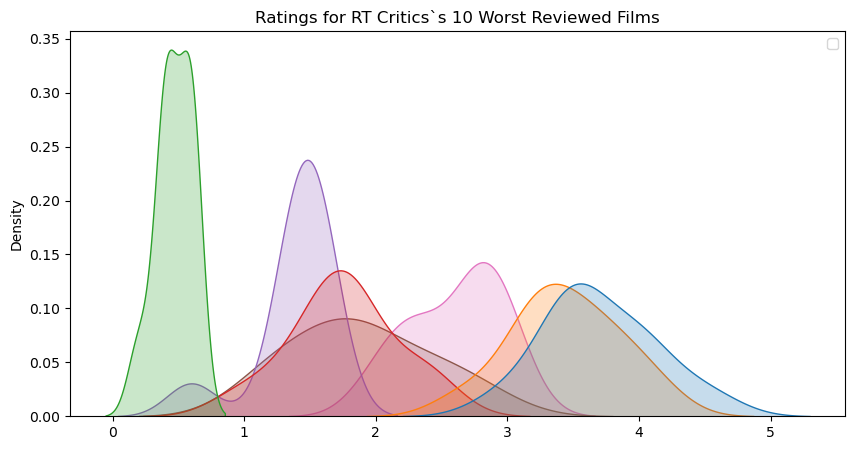

In [52]:
# CODE HERE
plt.figure(figsize=(10,5))
worst = norm_scores.nsmallest(10, 'RT_Norm')
plt.title('Ratings for RT Critics`s 10 Worst Reviewed Films')
sns.kdeplot(data = worst, fill=True)
plt.legend()

---
----

<img src="https://upload.wikimedia.org/wikipedia/en/6/6f/Taken_3_poster.jpg">

**Fandango is showing around 3-4 star ratings for films that are clearly bad! Notice the biggest offender, [Taken 3!](https://www.youtube.com/watch?v=tJrfImRCHJ0). Fandango is displaying 4.5 stars on their site for a film with an [average rating of 1.86](https://en.wikipedia.org/wiki/Taken_3#Critical_response) across the other platforms!**

In [53]:
0.4+2.3+1.3+2.3+3

9.3

In [54]:
9.3/5

1.86

----